In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/dataset/Income1.csv')

In [4]:
data.Education.values.reshape(-1,1)

array([[10.        ],
       [10.40133779],
       [10.84280936],
       [11.24414716],
       [11.64548495],
       [12.08695652],
       [12.48829431],
       [12.88963211],
       [13.2909699 ],
       [13.73244147],
       [14.13377926],
       [14.53511706],
       [14.97658863],
       [15.37792642],
       [15.77926421],
       [16.22073579],
       [16.62207358],
       [17.02341137],
       [17.46488294],
       [17.86622074],
       [18.26755853],
       [18.7090301 ],
       [19.11036789],
       [19.51170569],
       [19.91304348],
       [20.35451505],
       [20.75585284],
       [21.15719064],
       [21.59866221],
       [22.        ]])

Text(0,0.5,'income')

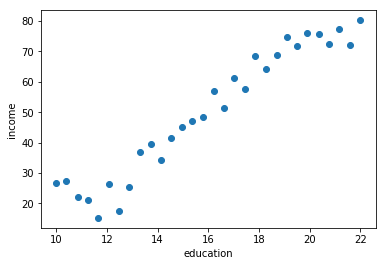

In [5]:
plt.scatter(data.Education, data.Income)
#如果在IDE中需要添加plt.show()
plt.xlabel('education')
plt.ylabel('income')

In [74]:
from torch import nn
#nn是pytorch是核心api
#首先预处理数据
x = data.Education.values.reshape(-1,1).astype(np.float32) 
y = data.Income.values.reshape(-1, 1).astype(np.float32)

In [75]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [76]:
x

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

In [77]:
y

tensor([[26.6588],
        [27.3064],
        [22.1324],
        [21.1698],
        [15.1926],
        [26.3990],
        [17.4353],
        [25.5079],
        [36.8846],
        [39.6661],
        [34.3963],
        [41.4980],
        [44.9816],
        [47.0396],
        [48.2526],
        [57.0343],
        [51.4909],
        [61.3366],
        [57.5820],
        [68.5537],
        [64.3109],
        [68.9590],
        [74.6146],
        [71.8672],
        [76.0981],
        [75.7752],
        [72.4861],
        [77.3550],
        [72.1188],
        [80.2606]])

In [78]:
model = nn.Linear(1, 1) # out = w*input+b

In [79]:
model.bias

Parameter containing:
tensor([0.0460], requires_grad=True)

In [80]:
loss_function = nn.MSELoss()  #得到损失函数计算方法

In [81]:
optimize = torch.optim.SGD(model.parameters(), lr=0.0001)

In [82]:
for epoch in range(5000):
    for i, j in zip(x, y):
        y_pred = model(i) #使用模型预测
        loss = loss_function(j, y_pred)  #计算损失
        optimize.zero_grad()     #把变量梯度清0
        loss.backward()   # 求解梯度
        optimize.step()   #优化过程
        # print(model.bias)

In [84]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[4.9744]], requires_grad=True)
Parameter containing:
tensor([-28.3672], requires_grad=True)


Text(0,0.5,'income')

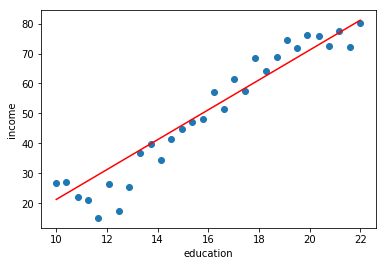

In [16]:
plt.scatter(data.Education, data.Income)
plt.plot(x.numpy(), model(x).data.numpy(), color='r')
plt.xlabel('education')
plt.ylabel('income')

In [18]:
#创建张量
x = torch.rand(2, 3)#均匀分布

In [19]:
x = torch.randn(2, 3)#正太分布
x = torch.zeros(2, 3)#全零
x = torch.ones(2, 3)#全1
x.size()#返回形状
x.size(0)#返回第0个维度的长度 
x.shape

torch.Size([2, 3])

In [20]:
#tensor数据类型的转换
x = torch.tensor([6, 2], dtype=torch.float32)
x.type()
x.type(torch.int32)#通过type方法,不传参数，返回当前的类型，加入参数，转换成传入参数表示的类型

tensor([6, 2], dtype=torch.int32)

In [21]:
#tensor与ndarray数据类型之间的转换
x = np.random.randn(2, 3)
x1 = torch.from_numpy(x)
x2 = x1.numpy()
print(x1)
print(x2)

tensor([[-0.4247,  1.1435, -0.9162],
        [ 0.4766, -0.5455, -0.1478]], dtype=torch.float64)
[[-0.42466313  1.14351381 -0.91615552]
 [ 0.47662559 -0.54551266 -0.14777922]]


In [22]:
#tensor的运算，与numpy的ndarray的运算想同
x1 = torch.randn(2, 3)
x2 = torch.rand(2, 3)
print(x1, '\n', x2)

tensor([[ 0.5243,  1.7043,  0.6215],
        [-0.0941, -0.1075, -1.2008]]) 
 tensor([[0.7202, 0.6538, 0.5032],
        [0.0749, 0.0735, 0.8141]])


In [23]:
x1 + x2 #相加,x1和x2都没有改变
x1 + 3  #各个元素加3
x1.add(3)#x1还是没有改变
x1.add_(3)#会直接改变x1

tensor([[3.5243, 4.7043, 3.6215],
        [2.9059, 2.8925, 1.7992]])

In [24]:
#x1的变形
# tensor的view相当于numpy的reshape,同时tensor也有reshape的方法，
print(x1.view(3, 2))
print(x1.reshape(3, 2))
print(x1.view(-1, 1))#一般是用来展平

tensor([[3.5243, 4.7043],
        [3.6215, 2.9059],
        [2.8925, 1.7992]])
tensor([[3.5243, 4.7043],
        [3.6215, 2.9059],
        [2.8925, 1.7992]])
tensor([[3.5243],
        [4.7043],
        [3.6215],
        [2.9059],
        [2.8925],
        [1.7992]])


In [25]:
#求x1的均值
x1.mean()

tensor(3.2413)

In [26]:
x = x1.sum()

In [27]:
x

tensor(19.4477)

In [28]:
x.item()#如果x中只有一个数的话，可以直接通过item转换成一个标量输出

19.44774055480957

In [29]:
#张量的自动微分
#将Torch.Tensor属性.requires_grad设置为True，pytorch将开始跟踪此张量的所有操作。完成计算后，可以调用.backward()并自动计算所有梯度。
#该张量的梯度将累加到.grad属性中。

In [30]:
x = torch.ones(2, 2, requires_grad=True)

In [31]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [32]:
x.requires_grad

True

In [33]:
y = x + 2

In [34]:
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [39]:
z = y.mean()

In [40]:
z.backward()

In [41]:
z = y.mean()

In [42]:
z

tensor(3., grad_fn=<MeanBackward0>)

In [43]:
z.backward()# 相当于计算dz/dx

In [44]:
x.grad

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [45]:
with torch.no_grad():#平常，我们在测试的时候，经常会把运算包含在no_grad()当中，因为我们只是测试，不需要跟踪梯度
    print((x**2).requires_grad)

False


In [46]:
(x**2).requires_grad

True

In [47]:
y = x.detach()#这个方法相当于no_grad()方法，也是将x的requires_grad设置为false。
y.requires_grad#记住，torch中的操作一般都不是原地的，都是将更改后的东西，返回出来，必须拿个变量接受
#原地改变一般都是方法名后加下划线

False

In [48]:
x = torch.tensor([2, 3], dtype=torch.float32)

In [49]:
x

tensor([2., 3.])

In [50]:
x.requires_grad_(True)

tensor([2., 3.], requires_grad=True)

In [51]:
#对上面的线性模型预测收入，分解写出，理解过程
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

In [63]:
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(type(w))

<class 'torch.Tensor'>


模型公式: w*x+b

In [96]:
learning_rate = 00.0001
for epoch in range(5000):
    for x,y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        loss = (y - y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= learning_rate * w.grad.data
            b.data -= learning_rate * b.grad.data

In [86]:
w

tensor([4.9729], requires_grad=True)

In [87]:
b


tensor([-28.3396], requires_grad=True)

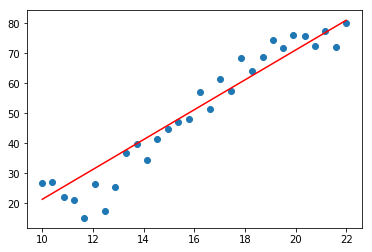

In [95]:
plt.scatter(data.Education, data.Income)
#X.numpy()
plt.plot(X.detach().numpy(), [w.data*x+b.data for x in X.detach().numpy()], color='r')

# 逻辑回归的实现

In [97]:
'''
线性回归预测的是连续值，罗辑回归给出的“是”和“否”的回答
sigmoid函数
'''

'\n线性回归预测的是连续值，罗辑回归给出的“是”和“否”的回答\nsigmoid函数\n'

# 逻辑回归损害函数
平方差所惩罚的是与损失为同一数量级的情形，对于分类问题，我们最好的使用交叉熵损失函数会更有效。
交叉熵会输出一个更大的“损失”
交叉熵刻画的是实际输出（概率）与期望输出（概率）的距离，也就是交叉熵的值越小，两个概率分布就越接近。假设概率分布p为期望输出，概率分布q为实际输出，H(p,q)为交叉熵，则：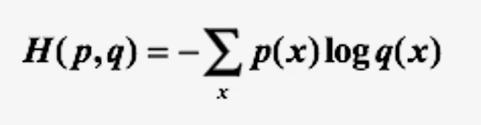
在pytorch中，我们使用nn.BCELoss()来计算二元交叉熵损失

In [102]:
data = pd.read_csv('./data/dataset/credit-a.csv', header=None)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
0     653 non-null int64
1     653 non-null float64
2     653 non-null float64
3     653 non-null int64
4     653 non-null int64
5     653 non-null int64
6     653 non-null int64
7     653 non-null float64
8     653 non-null int64
9     653 non-null int64
10    653 non-null int64
11    653 non-null int64
12    653 non-null int64
13    653 non-null int64
14    653 non-null float64
15    653 non-null int64
dtypes: float64(4), int64(12)
memory usage: 81.7 KB


In [105]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [119]:
X = data.iloc[:, :-1]

In [120]:
Y = data.iloc[:, -1].replace(-1, 0)

In [121]:
Y.unique()

array([0, 1])

In [122]:
X = torch.from_numpy(X.values).type(torch.float32)

In [126]:
Y.shape
print(X.shape)

torch.Size([653, 15])


In [124]:
Y = torch.from_numpy(Y.values.reshape(-1, 1)).type(torch.float32)

In [127]:
Y.shape

torch.Size([653, 1])

In [128]:
model = nn.Sequential(
            nn.Linear(15, 1),
            nn.Sigmoid()
)


In [129]:
model

Sequential(
  (0): Linear(in_features=15, out_features=1, bias=True)
  (1): Sigmoid()
)

In [130]:
loss_func = nn.BCELoss()

In [132]:
optimize = torch.optim.Adam(model.parameters(), lr=0.0001)

In [136]:
batchs = 16
no_of_batch = 653//16
print(no_of_batch)

40


In [150]:
epoches = 1500

In [151]:
for epoch in range(epoches):
    for batch in range(no_of_batch):
        start = batch * batchs
        end = start + batchs
        x = X[start: end]
        y = Y[start: end]
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        optimize.zero_grad()
        loss.backward()
        optimize.step()

In [152]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-1.3985e-01, -9.1110e-03,  5.7952e-03,  3.2813e-01,  7.9674e-02,
                       -1.4772e-02,  1.6944e-01, -1.3486e-01,  3.0857e+00,  2.8026e-01,
                       -1.6148e-01, -2.0397e-01, -5.1545e-02,  8.7634e-04, -3.3191e-04]])),
             ('0.bias', tensor([-0.2113]))])

In [153]:
((model(X).data.numpy() > 0.5).astype('int') == Y.numpy()).mean()

0.8744257274119449

# 多层感知器（神经网络）
上节我们学习的逻辑回归模型是单个神经元，计算输入特征的加权和，然后使用一个激活函数（或传递函数）计算输出
多种激活函数：
    1. relu
    2. sigmoid
    3. leak relu
    4. tanh

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('./data/dataset/HR.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   part                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [190]:
data.part.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [191]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [192]:
data.groupby(['salary', 'part']).size()

salary  part       
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
dtype: int64

In [15]:
data = data.join(pd.get_dummies(data.salary))#将传入的属性转变为独热编码

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [17]:
del data['salary']

In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [19]:
data = data.join(pd.get_dummies(data.part))

In [20]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,high,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
del data['part']

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   high                   14999 non-null  uint8  
 9   low                    14999 non-null  uint8  
 10  medium                 14999 non-null  uint8  
 11  IT                     14999 non-null  uint8  
 12  RandD                  14999 non-null  uint8  
 13  accounting             14999 non-null  uint8  
 14  hr                     14999 non-null  uint8  
 15  ma

In [24]:
#已经将数据的所有进行了数值化，现在就是要弄清楚x和y

In [25]:
data.left.value_counts()# 这里需要警惕，如果Y的分步是这样的，0和1不是均匀分布，可以计算一下0占总数的多少
11428/len(data)#发现0占76%，所以如果最后的模型如果都预测为0，模型的正确率也在76%，所以感觉正确率很高了，但是只是凑巧，是没有用的

0.7619174611640777

In [26]:
Y_data = data.left.values.reshape(-1, 1)

In [27]:
Y_data.shape

(14999, 1)

In [28]:
Y = torch.from_numpy(Y_data).type(torch.float32)

In [29]:
Y

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [30]:
X_data = data[[c for c in data.columns if c!='left']].values

In [31]:
X_data

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [32]:
X = torch.from_numpy(X_data).type(torch.float32)

In [33]:
X

tensor([[0.3800, 0.5300, 2.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.8000, 0.8600, 5.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.1100, 0.8800, 7.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.3700, 0.5300, 2.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.1100, 0.9600, 6.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.3700, 0.5200, 2.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [238]:
X.shape

torch.Size([14999, 20])

In [239]:
Y.shape

torch.Size([14999, 1])

# 创建模型

通过nn.Module来搭建模型

通过__init__：初始化所有层

通过forward：定义模型的运算过程（前向传播的过程）

In [241]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner_1 = nn.Linear(20, 64)
        self.liner_2 = nn.Linear(64, 64)
        self.liner_3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, input1):
        x = self.liner_1(input1)
        x = self.relu(x)
        x = self.liner_2(x)
        x = self.relu(x)
        x = self.liner_3(x)
        x = self.sigmoid(x)
        return x

In [244]:
model = Model()

# 改写模型

In [1]:
import torch.nn.functional as F
from torch import nn
import torch

In [2]:
# F.relu()     # F是函数式API，相当于我们在初始化模型的时候就不用初始化了，直接在forward中直接调用就可以
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner_1 = nn.Linear(20, 64)
        self.liner_2 = nn.Linear(64, 64)
        self.liner_3 = nn.Linear(64, 1)
        
    def forward(self, input1):
        x = F.relu(self.liner_1(input1))
        x = F.relu(self.liner_2(x))
        x = F.sigmoid(self.liner_3(x))
        return x

In [3]:
model = Model()

In [4]:
model

Model(
  (liner_1): Linear(in_features=20, out_features=64, bias=True)
  (liner_2): Linear(in_features=64, out_features=64, bias=True)
  (liner_3): Linear(in_features=64, out_features=1, bias=True)
)

In [5]:
lr = 0.0001

In [6]:
def get_model():
    model = Model()
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    return model, opt

In [7]:
model, optim = get_model()

# 定义损失函数

In [8]:
loss_fn = nn.BCELoss()

In [34]:
batch = 64
no_of_batches = len(X)//batch
epochs = 100

In [39]:
a = 0
for epoch in range(20):
    for i in range(no_of_batches):
        start = i*batch
        end = start + batch
        x = X[start: end]
        y = Y[start: end]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        a += loss.item()
        print(a)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        print('epoch:', epoch, ' loss:', loss_fn(model(X), Y).data.item())

/Users/optimus/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
0.5099758505821228
1.293027102947235
1.9342853426933289
2.4235682487487793
3.1115812063217163
3.703005850315094
4.178834795951843
4.749165952205658
5.277271330356598
5.885644733905792
6.345146596431732
6.872107625007629
7.468808054924011
8.018246531486511
8.472951143980026
9.026117533445358
9.587291449308395
9.96488207578659
10.527440905570984
10.89365828037262
11.397854447364807
11.912126898765564
12.433999061584473
12.8377166390419
13.267270624637604
13.656335294246674
14.105369806289673
14.53710588812828
14.904625743627548
15.35879036784172
15.829162985086441
16.452133804559708
17.17212262749672
17.820240527391434
18.44230780005455
19.000459641218185
19.555780559778214
20.16712048649788
20.654700696468353
21.348589062690735

# 使用dataset类进行构建

In [270]:
from torch.utils.data import TensorDataset

In [271]:
HRdataset = TensorDataset(X, Y)

In [273]:
len(HRdataset)
HRdataset[0:5]

(tensor([[3.8000e-01, 5.3000e-01, 2.0000e+00, 1.5700e+02, 3.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00],
         [8.0000e-01, 8.6000e-01, 5.0000e+00, 2.6200e+02, 6.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00],
         [1.1000e-01, 8.8000e-01, 7.0000e+00, 2.7200e+02, 4.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00],
         [7.2000e-01, 8.7000e-01, 5.0000e+00, 2.2300e+02, 5.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [284]:
model, opt = get_model()

In [286]:
for epoch in range(epochs):
    for i in range(no_of_batches):
        x, y = HRdataset[i*batch: i*batch+batch]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():
        print('epoch:', epoch, ' loss:', loss_fn(model(X), Y).data.item())

/Users/optimus/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 0  loss: 0.6185739636421204
epoch: 1  loss: 0.6051256060600281
epoch: 2  loss: 0.585969090461731
epoch: 3  loss: 0.601087212562561
epoch: 4  loss: 0.5706690549850464
epoch: 5  loss: 0.5761004686355591
epoch: 6  loss: 0.5822626352310181
epoch: 7  loss: 0.569270133972168
epoch: 8  loss: 0.5661882758140564
epoch: 9  loss: 0.5644578337669373
epoch: 10  loss: 0.5636300444602966
epoch: 11  loss: 0.5631433725357056
epoch: 12  loss: 0.5629239082336426
epoch: 13  loss: 0.5628947019577026
epoch: 14  loss: 0.5647311806678772
epoch: 15  loss: 0.5634415745735168
epoch: 16  loss: 0.5619903206825256
epoch: 17  loss: 0.5702695250511169
epoch: 18  loss: 0.5624945163726807
epoch: 19  loss: 0.5619982481002808
epoch: 20  loss: 0.5621541142463684
epoch: 21  loss: 0.5624427795410156
epoch: 22  loss: 0.5627502202987671
epoch: 23  loss: 0.5616241693496704
epoch: 24  loss: 0.564139187335968
epoch: 25  loss: 0.5653941631317139
epoch: 26  loss: 0.5653297901153564
epoch: 27  loss: 0.5657737851142883
epoch:

In [276]:
# 我们可以看到每次训练的时候，模型看到的数据都是有一定顺序的，无论我们怎么切片，都是相同的顺序
# 我们怎样才能使模型不关注顺序，能够乱序给它，关注数据本身
# 提出了dataloader类

# dataloader
通过dataloader方法，提供一个迭代的对象，并且可以无序的输出批次，使我们的训练更加简便。

In [287]:
from torch.utils.data import DataLoader

In [288]:
HR_ds = TensorDataset(X, Y)
HR_dl = DataLoader(HR_ds, batch_size=batch, shuffle=True)

In [289]:
model, opt = get_model()

for epoch in range(epochs):
    for x, y in HR_dl:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():
        print('epoch:', epoch, ' loss:', loss_fn(model(X), Y).data.item())

/Users/optimus/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 0  loss: 0.5597438216209412
epoch: 1  loss: 0.5568135380744934
epoch: 2  loss: 0.5532646179199219
epoch: 3  loss: 0.557971179485321
epoch: 4  loss: 0.5443223118782043
epoch: 5  loss: 0.5387037396430969
epoch: 6  loss: 0.5333834886550903
epoch: 7  loss: 0.5412779450416565
epoch: 8  loss: 0.518126904964447
epoch: 9  loss: 0.5071823596954346
epoch: 10  loss: 0.497702032327652
epoch: 11  loss: 0.48618391156196594
epoch: 12  loss: 0.4751099944114685
epoch: 13  loss: 0.4643169045448303
epoch: 14  loss: 0.4584665894508362
epoch: 15  loss: 0.44158074259757996
epoch: 16  loss: 0.4386447072029114
epoch: 17  loss: 0.4239268898963928
epoch: 18  loss: 0.4116957485675812
epoch: 19  loss: 0.41367149353027344
epoch: 20  loss: 0.3955649435520172
epoch: 21  loss: 0.38774076104164124
epoch: 22  loss: 0.3822007477283478
epoch: 23  loss: 0.3745253086090088
epoch: 24  loss: 0.3680866062641144
epoch: 25  loss: 0.36417147517204285
epoch: 26  loss: 0.3634641468524933
epoch: 27  loss: 0.3542407751083374


# 添加验证
## 了解过拟合与欠拟合
过拟合：对训练数据过度拟合，但是对于未知数据预测很差

欠拟合：对训练数据拟合不够，对于未知数据预测很差

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data)

In [296]:
X_data.shape

(14999, 20)

In [299]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((11249, 20), (11249, 1), (3750, 20), (3750, 1))

In [312]:
train_ds = TensorDataset(torch.from_numpy(train_x).type(torch.float32), torch.from_numpy(train_y).type(torch.float32))
train_dl = DataLoader(train_ds, batch_size=batch, shuffle=True)

In [313]:
test_ds = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
test_dl = DataLoader(test_ds, batch_size=batch)# shuffle会有额外开销

# 如何计算正确率

In [325]:
def acc(y_pred, y_true):
    y_pred = (y_pred > 0.5).type(torch.int32)
    acc = (y_pred == y_true).float().mean()
    return acc

In [327]:
model, opt = get_model()

for epoch in range(epochs):
    for x, y in train_dl:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():
        epoch_acc = acc(model(torch.from_numpy(train_x).type(torch.float32)), torch.from_numpy(train_y).type(torch.float32))
        epoch_loss = loss_fn(model(torch.from_numpy(train_x).type(torch.float32)), torch.from_numpy(train_y).type(torch.float32)).data
        
        epoch_test_acc = acc(model(torch.from_numpy(test_x).type(torch.float32)), torch.from_numpy(test_y).type(torch.float32))
        epoch_test_loss = loss_fn(model(torch.from_numpy(test_x).type(torch.float32)), torch.from_numpy(test_y).type(torch.float32)).data
        print('epoch:', epoch,
              'loss:', round(epoch_loss.item(), 3),
              'acc:', round(epoch_acc.item(), 3),
              'test_loss', round(epoch_test_loss.item(), 3),
              'test_acc', round(epoch_test_acc.item(), 3)
             )

/Users/optimus/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 0 loss: 0.564 acc: 0.763 test_loss 0.567 test_acc 0.757
epoch: 1 loss: 0.562 acc: 0.763 test_loss 0.566 test_acc 0.757
epoch: 2 loss: 0.56 acc: 0.763 test_loss 0.563 test_acc 0.757
epoch: 3 loss: 0.557 acc: 0.763 test_loss 0.561 test_acc 0.757
epoch: 4 loss: 0.554 acc: 0.763 test_loss 0.557 test_acc 0.757
epoch: 5 loss: 0.553 acc: 0.763 test_loss 0.556 test_acc 0.757
epoch: 6 loss: 0.547 acc: 0.763 test_loss 0.551 test_acc 0.757
epoch: 7 loss: 0.543 acc: 0.763 test_loss 0.546 test_acc 0.757
epoch: 8 loss: 0.538 acc: 0.763 test_loss 0.543 test_acc 0.757
epoch: 9 loss: 0.535 acc: 0.763 test_loss 0.539 test_acc 0.757
epoch: 10 loss: 0.528 acc: 0.763 test_loss 0.532 test_acc 0.757
epoch: 11 loss: 0.523 acc: 0.763 test_loss 0.527 test_acc 0.757
epoch: 12 loss: 0.519 acc: 0.763 test_loss 0.524 test_acc 0.757
epoch: 13 loss: 0.51 acc: 0.763 test_loss 0.514 test_acc 0.757
epoch: 14 loss: 0.503 acc: 0.763 test_loss 0.508 test_acc 0.757
epoch: 15 loss: 0.498 acc: 0.763 test_loss 0.502 tes